Assignment 1 - supermarket_sales
Name - Devinder Chand
Student ID - 991717596



# Part 2: Choose a Dataset
#  link to your dataset in the report is below 
# For example, i have  used the supermarket sales dataset:
# https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales



 Part 3: Ask a Question
 My logistic question is
 For example:
 "Can we predict the product line based on customer demographics and purchase details?"


In [10]:
# Part 4: Clean Your Data
import pandas as pd

# Load the dataset
file_path = 'supermarket_sales.csv'
df = pd.read_csv(file_path)

# Display the initial data
print("Initial Data:")
print(df.head())

# Data cleaning and preprocessing
# For example:
# Drop rows with missing values
df.dropna(inplace=True)

# Select relevant columns
df = df[['Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'Rating']]

# Convert categorical columns to numerical
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Payment'] = df['Payment'].map({'Cash': 0, 'Credit card': 1, 'Ewallet': 2})

# Display cleaned data
print("\nCleaned Data:")
print(df.head())


Initial Data:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415   

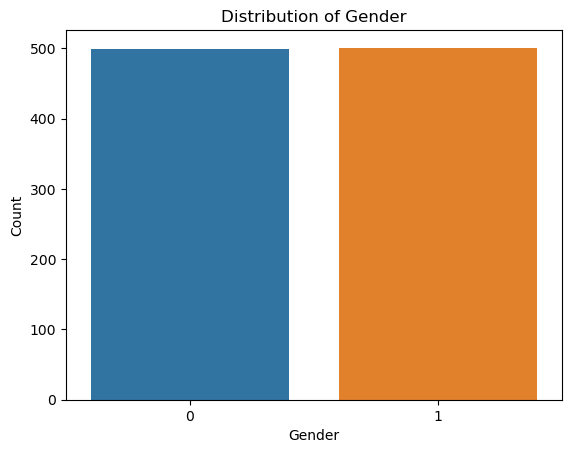

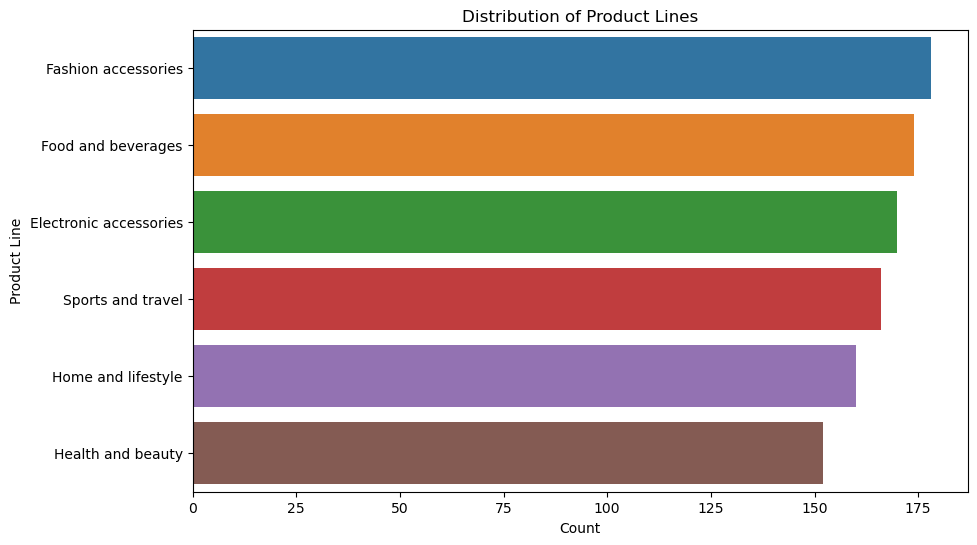

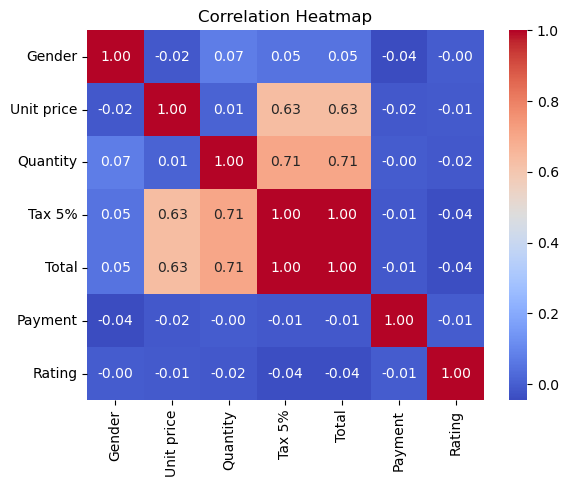

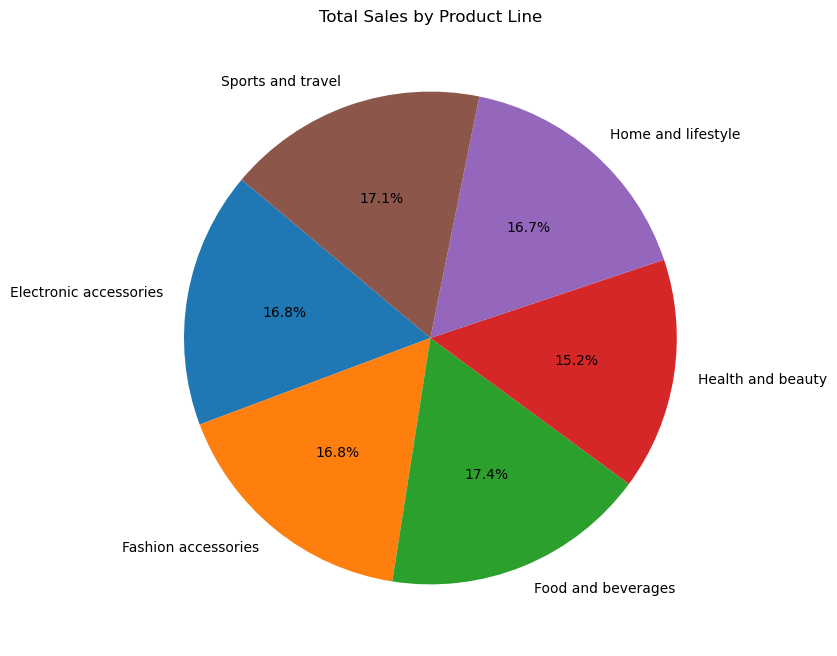

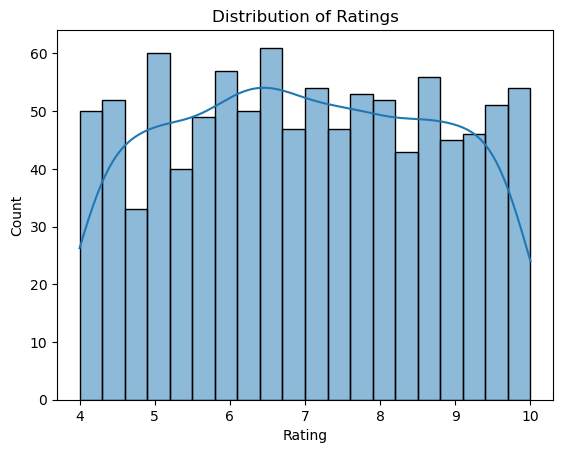

In [11]:
# Part 5: Graph Your Data
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plot 2: Product Line Distribution
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility

sns.countplot(y='Product line', data=df, order=df['Product line'].value_counts().index)
plt.title('Distribution of Product Lines')
plt.xlabel('Count')
plt.ylabel('Product Line')
plt.show()


# Plot 3: Correlation Heatmap
# Exclude non-numeric columns before calculating correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Plot 4: Total Sales by Product Line (as Pie Chart)
plt.figure(figsize=(8, 8))  # Adjust the figure size for a better-looking pie chart

total_sales_by_product_line = df.groupby('Product line')['Total'].sum()
plt.pie(total_sales_by_product_line, labels=total_sales_by_product_line.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Product Line')
plt.show()


# Plot 5: Rating Distribution
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [25]:
# Assuming df is already loaded and cleaned
# part 6
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X = df[['Gender', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'Rating']]
y = df['Product line']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model with tuned hyperparameters
model = LogisticRegression(C=1.0, max_iter=1000, random_state=42)  # You can adjust hyperparameters
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)




In [22]:
# Part 7: Evaluate Your Model
# Provide an evaluation of your model in the report
# For example:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy}')

# Display classification report for more detailed evaluation
print('\nClassification Report:')
print(classification_report(y_test, y_pred))



Model Accuracy: 0.17

Classification Report:
                        precision    recall  f1-score   support

Electronic accessories       0.00      0.00      0.00        33
   Fashion accessories       0.23      0.12      0.16        41
    Food and beverages       0.00      0.00      0.00        32
     Health and beauty       0.00      0.00      0.00        30
    Home and lifestyle       0.18      0.77      0.29        35
     Sports and travel       0.12      0.07      0.09        29

              accuracy                           0.17       200
             macro avg       0.09      0.16      0.09       200
          weighted avg       0.09      0.17      0.10       200



c:\Users\devin\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\devin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\devin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\devin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samp